In [1]:
exec(open("channel_polar_data.py").read())

In [2]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("index");
plt.ylabel("capacity");
plt.plot(a90thSNR_capacity_decode, '.')


In /home/william/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/william/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/william/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/william/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/william/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [3]:
import numpy as np

In [4]:
x_db = np.linspace(-20, 10, 100)
snr_v = np.power(10, x_db/10)

In [5]:
def cap(snr):
    rx = -1 + np.random.rand(1000)
    channel_llr = 2*rx*snr;
    information = np.log2(1+np.exp(channel_llr));
    capacity = 1 - np.mean(information);
    return capacity

In [6]:
capacity = [cap(snr) for snr in snr_v]

In [9]:
capacity

[0.007292044216156701,
 0.007723477492439734,
 0.008634808236294922,
 0.008945498832425569,
 0.009495243252491958,
 0.010386161228363777,
 0.010990811326365924,
 0.011591134337646691,
 0.01229988549617611,
 0.013366762872085935,
 0.014804811642060711,
 0.0156816786155749,
 0.016801314717146743,
 0.017394161118120532,
 0.018787500268552138,
 0.02019066335552655,
 0.021922008781472213,
 0.023215449607709826,
 0.024813854398679336,
 0.026501977635459806,
 0.029323071453236094,
 0.031074532708145752,
 0.03213659092276078,
 0.03541138762349283,
 0.038280225828092984,
 0.04121430070690457,
 0.043221441857703824,
 0.047500314660642085,
 0.047100960104732637,
 0.05295168722907628,
 0.057872978554825094,
 0.05903694406641402,
 0.0653940381105459,
 0.06878054615948792,
 0.07223380942254043,
 0.08220625351048239,
 0.08675554230181381,
 0.09014439137309593,
 0.09624827660504143,
 0.10168508577574698,
 0.11300349560339407,
 0.12010335315037701,
 0.12634800916089461,
 0.13658955270825834,
 0.1428299

In [7]:
data = []
for i in range(100):
    exec("y = a"+str(i)+"thSNR_capacity_decode")
    data.append(y)

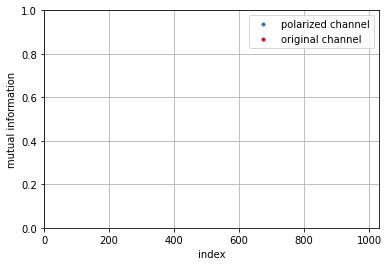

In [8]:
from matplotlib.animation import FuncAnimation, PillowWriter  
fig, ax = plt.subplots()
plt.grid()
plt.xlabel("index");
plt.ylabel("mutual information");
pp, = plt.plot([],[], '.', label = 'polarized channel')
cc, = plt.plot([],[], 'r.', label = 'original channel')
plt.legend()
def init():  
    ax.set_xlim(0, 1030)  
    ax.set_ylim(0, 1) 

def update(i):
    ax.set_title('snr = '+(str(x_db[i])[:7])+'dB')
    pp.set_data(list(range(len(data[i]))),list(data[i]))
    cc.set_data(list(range(len(data[i]))), capacity[i]*np.ones_like(data[i]) )
                
ani = FuncAnimation(fig, update, range(100), init_func=init)  

In [9]:
writer = PillowWriter(fps=5)  
ani.save("test3.gif", dpi=180, writer=writer) 
#ani.save("test.gif", dpi=80, writer='imagemagick') 
 


In [24]:
str(x_db[3])[:7]

'-19.090'

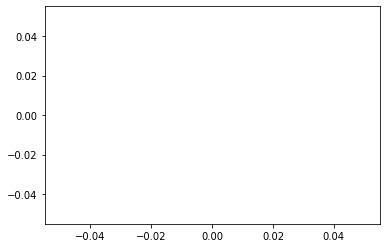

In [47]:
fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')


def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)  

def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos) 
    
ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init) 
plt.show()

In [62]:
exec("t = a"+str(99)+"thSNR_capacity_decode")